In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

ModuleNotFoundError: No module named 'otter'

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/madisonenda/eds220-hwk2 


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

In [ ]:
# FINAL CODE



## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [32]:
# a.
# Importing the pandas package
import pandas as pd
import numpy as np
import seaborn as sns

# Importing the salmon_data.csv with pd.read_csv and assigning it to the variable `catch_data`
catch_data = pd.read_csv('data/salmon_data.csv')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [3]:
# b.
# Looking at the shape of the data frame using .shape
print(catch_data.shape)

# Looking at the first 5 rows of the data frame with .head()
catch_data.head()

(8540, 5)


,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

- In part b.) I simply looked at the shape of the data frame, and found that it has 8540 observations (rows) of 5 different variables (columns). By looking at the the first 5 rows, I found out what each column name is and what a typical observation looks like for each variable. 

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [4]:
# Using .unique to store the unique labels for each observation in the `notesRegCode` column as a variable called `notes_unique`
notes_unique = catch_data['notesRegCode'].unique()
print(notes_unique)

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [5]:
# Getting rid of the notesRegCode column in the dataframe using .drop(). By setting axis as 1, we verify we drop the column and not the labels in the index (which would be 0)
catch_data = catch_data.drop('notesRegCode', axis= 1)

# Checking to see if the `notesRegCode` column is gone
catch_data.head()

,Region,Year,Species,Catch
0,SSE,1886,Chinook,0
1,SSE,1887,Chinook,0
2,SSE,1888,Chinook,0
3,SSE,1889,Chinook,0
4,SSE,1890,Chinook,0


<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


- They appear to all be the correct data type except for the catch column, which is an object despite the fact that catch is counted in integers. 

In [6]:
# Checking the data type of the columns in catch_data using .dtypes()
catch_data.dtypes

Region     object
Year        int64
Species    object
Catch      object
dtype: object

<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [7]:
catch_data['Catch'].astype('int64')

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. 

In [8]:
# Using .loc to filter the Catch column in catch_data to only include observations where the value matches "I"
catch_I = catch_data.loc[catch_data['Catch'] == "I"]

# Printing our result to check and see if this was done correctly 
catch_I 

,Region,Year,Species,Catch
400,GSE,1955,Chinook,I


## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

In [9]:
# Assigning the value of the 400th observation of the Catch column to be 1 instead of I using .at
catch_data.at[400,'Catch']=1

In [10]:
# Accessing the 400th row of the data frame that we just edited above and assigning it to the catch_1 variable
catch_1 = catch_data.iloc[[400]]

# Printing the result of catch_1 to check out work
catch_1

,Region,Year,Species,Catch
400,GSE,1955,Chinook,1


## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [11]:
# Using the method shown above to convert the data type of the values of the catch column to be integers instead of objects
catch_data['Catch'] = catch_data['Catch'].astype('int64')

# Checking the results of the catch_column_type to verify it worked
catch_column_type = catch_data['Catch'].dtype

# Printing out the result of the catch_column_type variable
catch_column_type

dtype('int64')

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [21]:
# Finding the average salmon catch pergion by grouping the catch_data by `Region` and then taking the mean of the `Catch` values
avg_catch = catch_data.groupby('Region')['Catch'].mean()

# Creating a data frame with the average catch by region assigned to the variable avg_region
avg_region = pd.DataFrame(avg_catch)

avg_region.head()

,Catch
Region,
ALU,40.383908
BER,16.372549
BRB,2709.796491
CHG,315.487273
CKI,683.571429


<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

Text(0, 0.5, 'Average Catch (counts)')

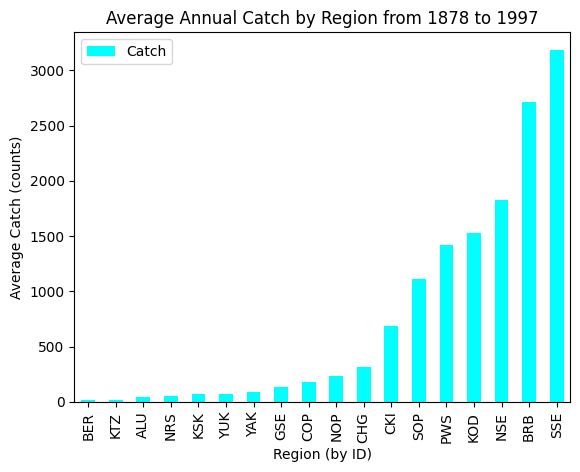

In [50]:
# Sorting the average catch by ascending order for best visualization with graph
avg_region = avg_region.sort_values(by= "Catch", ascending=True)

# Creating our bar graph for the average catch by region for our data
ax= avg_region.plot.bar(title= "Average Annual Catch by Region from 1878 to 1997", color= "cyan")
ax.set_xlabel("Region (by ID)")
ax.set_ylabel("Average Catch (counts)")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

- Looking at the bar graph, it seems more than half (11/18) of all regions have rather low average annual fishing yield (below 500 fish), while 7 of the regions have much higher yields. In particular, SSE and BRB had average annual catches over well over six times that of the lower 11 regions, at around 2,800 and 3,300 fish annually. 

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).